In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [18]:
# Call in the cleaned data file

df=pd.read_csv('project2.csv')

In [47]:
df
#Gross Revenue(Profit) = Domestic_Gross-Opening Weekend


,Title,Domestic_Gross,International_Collection,Worldwide_Gross,Opening_Weekend,Budget,Release_Date,Runtime,Genre,Rating,Release_Month,Profit,log_opening_weekend,log_budget,log_international_collection,log_profit
0,Star Wars: Episode VII - The Force Awakens (2015),0.000937,0.001133,0.002070,0.000248,0.000245,"December 16, 2015\n (EMEA, APAC)",2 hr 18 min,Action\n \n Adventure\n \n ...,PG-13,December,688.695550,-8.302216,-8.314252,-6.783010,6.534799
1,Avengers: Endgame (2019),0.000858,0.001939,0.002798,0.000357,0.000356,"April 24, 2019\n (21 markets)",3 hr 1 min,Action\n \n Adventure\n \n ...,PG-13,April,501.257993,-7.937453,-7.940580,-6.245517,6.217121
2,Avatar (2009),0.000761,0.002087,0.002847,0.000077,0.000237,"December 16, 2009\n (LATAM, EMEA)",2 hr 42 min,Action\n \n Adventure\n \n ...,PG-13,December,683.482144,-9.471374,-8.347450,-6.172153,6.527201
3,Titanic (1997),0.000659,0.001542,0.002202,0.000029,0.000200,"December 19, 1997\n (Domestic)",3 hr 14 min,Drama\n \n Romance,PG-13,December,630.725813,-10.460771,-8.517193,-6.474491,6.446871
4,Jurassic World (2015),0.000652,0.001018,0.001671,0.000209,0.000150,"June 10, 2015\n (9 markets)",2 hr 4 min,Action\n \n Adventure\n \n ...,PG-13,June,443.579355,-8.474104,-8.804875,-6.889787,6.094877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Nacho Libre (2006),0.000080,0.000019,0.000099,0.000028,0.000035,"June 16, 2006\n (Domestic)",1 hr 32 min,Comedy\n \n Family\n \n Sport,PG,June,51.888394,-10.472310,-10.260162,-10.868052,3.949095
807,Jumper (2008),0.000080,0.000145,0.000225,0.000027,0.000085,"February 13, 2008\n (6 markets)",1 hr 28 min,Action\n \n Adventure\n \n ...,PG-13,February,52.817320,-10.506618,-9.372859,-8.839053,3.966839
808,Goosebumps (2015),0.000080,0.000078,0.000158,0.000024,0.000058,"October 14, 2015\n (Malaysia)",1 hr 43 min,Adventure\n \n Comedy\n \n ...,PG,October,56.461823,-10.653478,-9.755068,-9.456483,4.033565
809,Jack Reacher (2012),0.000080,0.000138,0.000218,0.000015,0.000060,"December 20, 2012\n (EMEA, APAC)",2 hr 10 min,Action\n \n Thriller,PG-13,December,64.860580,-11.093547,-9.721166,-8.886303,4.172240


In [46]:
#STATSMODELS ANALYSIS-
lr = smf.ols('Profit ~ International_Collection + Opening_Weekend + Budget', data=df)
fit = lr.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     327.0
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          6.44e-139
Time:                        23:31:00   Log-Likelihood:                -4357.4
No. Observations:                 811   AIC:                             8723.
Df Residuals:                     807   BIC:                             8742.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   72.3806      3.352     21.593      0.000      65.801      78.960
International_Collection  2.706e+05   1.27e+04     21.231      0.000    2.46e+05    2.96e+05
Opening_Weekend            3.64e+05   7.54e+04      4.825      0.000    2.16e+05    5.12e+05
Budget                   -2.935e+05   4.13e+04     -7.108      0.000   -3.75e+05   -2.12e+05
==============================================================================
Omnibus:                      262.194   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.258
Skew:                           1.398   Prob(JB):                    2.99e-280
Kurtosis:                       8.503   Cond. No.                     4.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#TRAIN-VALIDATION SETS/TEST split in the ratio of 80/20
#set X and y as the two datasets
X = df.loc[:,['International_Collection','Budget','Opening_Weekend']]
y = df['Profit']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=25)

In [21]:
#CROSS VALIDATION LINEAR REGRESSION ON TRAINING DATA

kf = KFold(n_splits=5, shuffle=True, random_state = 42)
lr1_cv = LinearRegression()
lr1_cv.fit(X, y)
print(cross_val_score(lr1_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lr1_cv, X, y, cv=kf, scoring='r2')))

[0.34897432 0.31097538 0.64277112 0.47823178 0.61009786]
0.47821009167419826


In [14]:
#Standardization
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
X_test_scaled = std.transform(X_test.values)

In [22]:
#Determining the Alpha for Ridge
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

new_ridge=rm_cv.fit(X_scaled, y)
alpha1 = new_ridge.alpha_

print(alpha1)

0.1


In [23]:
#Ridge Regression
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
RidgeCV = Ridge(alpha=0.1)
RidgeCV.fit(X_scaled, y)
print(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2')))

[0.34907096 0.31106945 0.64270682 0.47821008 0.61004835]
0.4782211322443118


In [25]:
#Determining the Alpha for Ridge
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0])
new_lasso=lasso_cv.fit(X_scaled, y)
alpha2 = new_lasso.alpha_
print(alpha2)

0.1


In [26]:
#Lasso CV Regresion 
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
LassoCV = Lasso(alpha=0.1)
LassoCV.fit(X_scaled, y)
print(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2')))

[0.35069326 0.3122824  0.64232248 0.47772106 0.60877504]
0.4783588482798118


In [34]:
#LOG TRANSFORMED VALUES
X_log = df.loc[:,['log_international_collection','log_budget','log_opening_weekend']]
y_log = df['log_profit']
X_log, X_log_test, y_log, y_log_test = train_test_split(X_log, y_log, test_size=.2, random_state=42)

In [35]:
#LINEAR REGRESSION ON TRAINING DATA
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
lm_cv_log = LinearRegression()
lm_cv_log.fit(X_log, y_log)
print(cross_val_score(lm_cv_log, X_log, y_log, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_cv_log, X_log, y_log, cv=kf, scoring='r2')))

[ 0.25390858  0.13193899  0.26528165  0.29367254 -0.13651537]
0.16165727672571714


In [36]:
#Stardardization
std = StandardScaler()
std.fit(X.values)
X_log_scaled = std.transform(X_log.values)
X_log_test_scaled = std.transform(X_log_test.values)

In [33]:
#Ridge CV Regression
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
RidgeCV_log = Ridge(alpha=0.1)
RidgeCV_log.fit(X_log_scaled, y_log)
print(cross_val_score(RidgeCV_log, X_log_scaled, y_log, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(RidgeCV_log, X_log_scaled, y_log, cv=kf, scoring='r2')))

[ 0.25390858  0.13193899  0.26528165  0.29367254 -0.13651537]
0.16165727672689742


In [38]:
#Lasso CV Regresion 
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
LassoCV_log = Lasso(alpha=0.1)
LassoCV_log.fit(X_log_scaled, y_log)
print(cross_val_score(LassoCV_log, X_log_scaled, y_log, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(LassoCV_log, X_log_scaled, y_log, cv=kf, scoring='r2')))

[ 0.25389954  0.13195011  0.26527239  0.29366011 -0.13642721]
0.16167098803475716


In [41]:
#from these results, Lasso has the best R-Squared compared to  Linear Regression and Ridge, 
#so I'll be choosing Lasso to conduct my tests

test_prediction = LassoCV.predict(X_test_scaled)

In [42]:
#Here I'm determining the R-Squared Value on the test data
r2_score(y_test, test_prediction)

0.6127670069880529

In [44]:
#Here I'm defining the Mean Absolute Error:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

y_err=mae(y_test, test_set_pred)
print(y_err)

32.1341488953974


Text(0.5, 1.0, 'Gross Domestic Revenue')

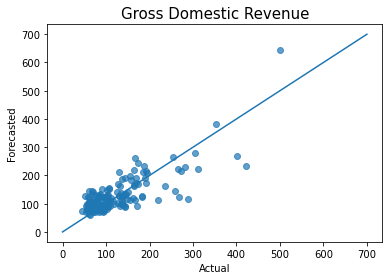

In [45]:
plt.scatter(y_test, test_set_pred, alpha=.7)
plt.plot(np.linspace(0,700,100), np.linspace(0,700,100))
plt.xlabel("Actual")
plt.ylabel("Forecasted")
plt.title("Gross Domestic Revenue", fontsize=15)

